In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
file_path = 'https://raw.githubusercontent.com/deepu099cse/Multi-Labeled-Bengali-Toxic-Comments-Classification/main/Multi_labeled_toxic_comments.csv'
df = pd.read_csv(file_path)
df.head()

,text,vulgar,hate,religious,threat,troll,Insult
0,প্রধানমন্ত্রী হক সাহেবের ক্ষতি হলে জাতির স্বার...,0,0,0,1,0,0
1,"আমি বললাম, ‘দেন’",0,0,0,0,0,0
2,অসাধারণ তানজিন তিশা আমার বালো লাগার একজনকাতার ...,0,0,0,0,0,0
3,তার উপর ২ জন মেয়র,0,0,0,0,0,0
4,পলাশের কাজ এতো ভালো হবে কল্পনাও করি নাই তৌহিদে...,0,0,0,0,0,0


In [3]:
df['bullying'] = df[['vulgar', 'hate', 'religious', 'threat', 'troll', 'Insult']].max(axis=1)
df.head()

,text,vulgar,hate,religious,threat,troll,Insult,bullying
0,প্রধানমন্ত্রী হক সাহেবের ক্ষতি হলে জাতির স্বার...,0,0,0,1,0,0,1
1,"আমি বললাম, ‘দেন’",0,0,0,0,0,0,0
2,অসাধারণ তানজিন তিশা আমার বালো লাগার একজনকাতার ...,0,0,0,0,0,0,0
3,তার উপর ২ জন মেয়র,0,0,0,0,0,0,0
4,পলাশের কাজ এতো ভালো হবে কল্পনাও করি নাই তৌহিদে...,0,0,0,0,0,0,0


In [5]:
X = df['text']
y = df['bullying']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [8]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression()

In [9]:
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [10]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8115085536547434
Confusion Matrix:
[[1082  387]
 [ 219 1527]]


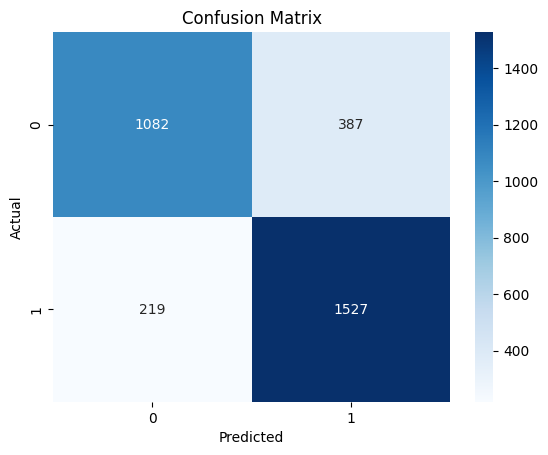

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / sum(sum(conf_matrix))

print(f'Accuracy: {accuracy}')

Accuracy: 0.8115085536547434


In [15]:

# Calculate precision from the confusion matrix
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

print(f'Precision: {precision}')


Precision: 0.7978056426332288


In [16]:

# Calculate recall from the confusion matrix
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])

print(f'Recall: {recall}')


Recall: 0.8745704467353952


In [17]:
true_positive_rate = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])

# Calculate True Negative Rate (Specificity)
true_negative_rate = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print(f'True Positive Rate (Sensitivity): {true_positive_rate}')
print(f'True Negative Rate (Specificity): {true_negative_rate}')

True Positive Rate (Sensitivity): 0.8745704467353952
True Negative Rate (Specificity): 0.7365554799183118
